# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../datasets/traffic-signs-data/train.p"
validation_file =  "../datasets/traffic-signs-data/valid.p"
testing_file = "../datasets/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train_ shape", X_train.shape)
print("y_train_ shape", y_train.shape)

print("X_valid_ shape", X_valid.shape)
print("y_valid_ shape", y_valid.shape)

print("X_test_ shape", X_test.shape)
print("y_test_ shape", y_test.shape)

print("step0 -> Load the data -> done!")

X_train_ shape (34799, 32, 32, 3)
y_train_ shape (34799,)
X_valid_ shape (4410, 32, 32, 3)
y_valid_ shape (4410,)
X_test_ shape (12630, 32, 32, 3)
y_test_ shape (12630,)
step0 -> Load the data -> done!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
## Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
unique_labels_set = set(train['labels'])
unique_labels = np.array(list(unique_labels_set))
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Unique labels =", unique_labels_set)

print("step1 -> Provide a basic summary -> done!")

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Unique labels = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}
step1 -> Provide a basic summary -> done!


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

step1 -> exploratory visualization of the dataset -> done!


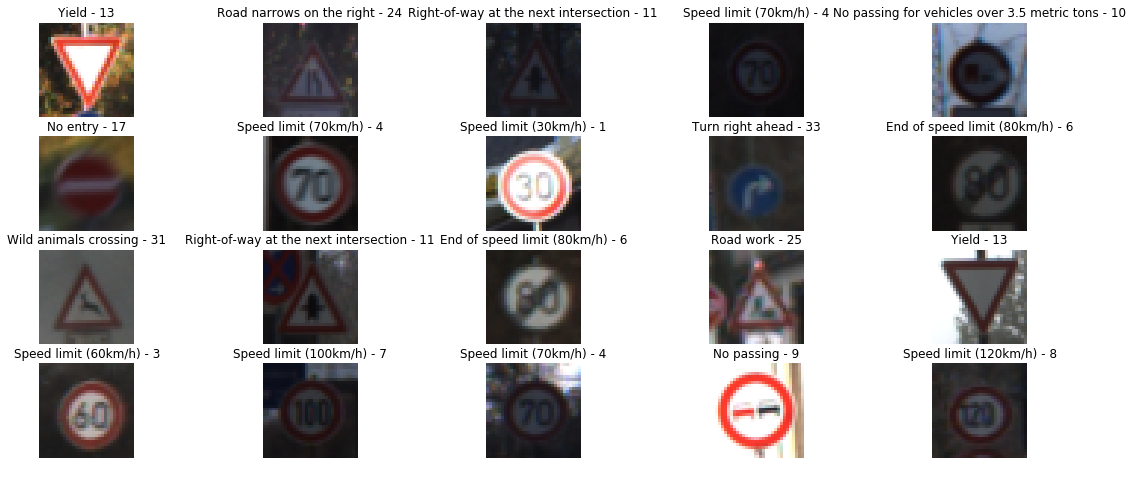

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import csv
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

# load titles (english description) from .csv
label_map = {}
with open('./signnames.csv', newline='') as file:
    reader = csv.reader(file)
    for row in list(reader)[1:]:  
        label_map[row[0]] = row[1]

# show images of 20 random data points
fig, axs = plt.subplots(4,5, figsize=(20, 8))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_train))
    image = X_train[index]    
    axs[i].axis('off')
    axs[i].imshow(image)  
    axs[i].set_title( label_map[str(y_train[index])] + " - " + str(y_train[index]) )


print("step1 -> exploratory visualization of the dataset -> done!")

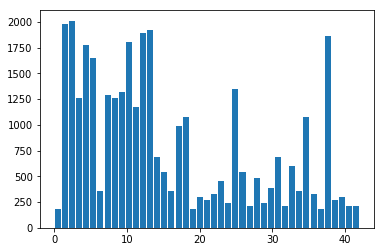

step1 -> histogram of label frequency -> done!


In [51]:
# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.85 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
print("step1 -> histogram of label frequency -> done!")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Road work - Index: 25
step2 -> preprocess the data set -> done!


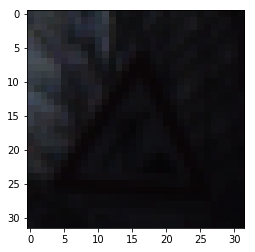

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

num_channels = 3
train_features, train_labels = np.array(train['features']), np.array(train['labels'])
valid_features, valid_labels = np.array(valid['features']), np.array(valid['labels'])
test_features, test_labels = np.array(test['features']), np.array(test['labels'])

# suffle data
train_features, train_labels = shuffle(train_features, train_labels)
valid_features, valid_labels = shuffle(valid_features, valid_labels)
test_features, test_labels = shuffle(test_features, test_labels)

plt.imshow(train_features[0])
      
print(label_map[str(train_labels[0])], '- Index: {}'.format(train_labels[0]))
# Normalize pixel values to [0, 1]
train_features = train_features / 255
valid_features = valid_features / 255
test_features = test_features / 255

print("step2 -> preprocess the data set -> done!")

#### Pre-processing the dataset

I did a  minimal pre-processing using only the raw images from the dataset.
Because I felt like the color information was a valuable and important information I kept the images in RGB, I didn't converted them to gray scale.

I implemented the image pre-processing with 2 steps:
1. Shuffling: Suffled the data to make sure about mixing (avoid groupings)
2. Normalizing: Normalized the data to [0, 1], easy diving the np.array by 255 

#### Dividing the Data to Train, Validate, and Test

The data came pre divided into training, validation, and test sets, all I had to do was pre-process each of these sets accordingly


### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

#----------------------------------------------------------------------------------------------------------------------
# My helpers fnc

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')

def conv2d(x, W, b, strides=1, padding='VALID'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) # all activations are using relu
#----------------------------------------------------------------------------------------------------------------------
# Architecture -> Implement a LeNet with 3 convs (maxpooling in specific layers)
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer

# epochs and batch size
EPOCHS = 10
BATCH_SIZE = 128

# mean and sigma
mu = 0        
sigma = 0.1     

# weigths
weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, num_channels, 6*num_channels], mu, sigma)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6*num_channels, 16*num_channels], mu, sigma)),
    'wc3': tf.Variable(tf.truncated_normal([4, 4, 16*num_channels, 32*num_channels], mu, sigma)),
    'wf1': tf.Variable(tf.truncated_normal([4*4*32*num_channels, 120*num_channels], mu, sigma)),
    'wf2': tf.Variable(tf.truncated_normal([120*num_channels, 84*num_channels], mu, sigma)),
    'out': tf.Variable(tf.truncated_normal([84*num_channels, n_classes], mu, sigma)),
}

# biases
biases = {
    'bc1': tf.Variable(tf.truncated_normal([6*num_channels], mu, sigma)),
    'bc2': tf.Variable(tf.truncated_normal([16*num_channels], mu, sigma)),
    'bc3': tf.Variable(tf.truncated_normal([32*num_channels], mu, sigma)),
    'bf1': tf.Variable(tf.truncated_normal([120*num_channels], mu, sigma)),
    'bf2': tf.Variable(tf.truncated_normal([84*num_channels], mu, sigma)),
    'out': tf.Variable(tf.truncated_normal([n_classes], mu, sigma)),
}

# LeNet with 3CNN
def LeNet3CNN(x):    
    # num_channels = 3
    # Convolution with Activation (cwa) Input = 32x32x(num_channels) -> Output = 28x28x(6*num_channels)
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # cwa Input = 28x28x(6*num_channels) -> Output = 24x24x(16*num_channels)
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # pooling Input = 24x24x(16*chan) -> Output = 12x12x(16*chan)
    conv2 = maxpool2d(conv2)    
    # cwa Input = 12x12x(16*num_channels) -> Output = 8x8x(32*num_channels)
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # pooling input = 8x8x(32*num_channels) -> Output = 4x4x(32*num_channels)
    conv3 = maxpool2d(conv3)    
    # flatten
    flat = flatten(conv3)    
    # fully-connected with activation
    fc1 = tf.add(tf.matmul(flat, weights['wf1']), biases['bf1'])
    fc1 = tf.nn.relu(fc1)
    # fully-connected with activation
    fc2 = tf.add(tf.matmul(fc1, weights['wf2']), biases['bf2'])
    fc2 = tf.nn.relu(fc2)
    # fully-connected
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])    

    return logits

print("step2 -> model architecture -> done!")

step2 -> model architecture -> done!


#### The model architecture

I implemented the same architecture from the LeNet Lab with a few small changes
- I used RGB images
- Added a third convolutional layer
I used convolutions, activations (relu), maxpooling and linear combinations 
The images are 32x32x3 and are 43 traffic signs categories.

##### The model look like:

- Input	-> RGB images of shape 32x32x3
- Convolution with Activation -> Transform from 32x32x3 to 28x28x18 using a 5x5 filter
- Convolution with Activation -> Transform from 28x28x18 to 24x24x48 using a 5x5 filter
- Maxpool -> Condense the space to 12x12x48
- Convolution with Activation -> Transform 12x12x48 into an 8x8x96 using a 4x4 filter
- Maxpool -> Condense the space to 4x4x96, bringing the total volume from 6,144 down to 1,536
- Flatten -> Flatten the space down to one dimension of size 1,536 in preparation for the fully-connected layers
- Fully-Connected with Activation -> input(4x4x32x3) to (120x3) Calculate linear combinations of the features bringing the space down to size 360
- Fully-Connected with Activation -> input(120x3) to (84x3) Calculate linear combinations of the features bringing the space down to size 252
- Output -> input(252) to (43) Calculate linear combinations of the 252 features to produce estimates for each of the 43 classes of traffic signs


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [1]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### Features and labels

In [6]:
input_images = tf.placeholder(tf.float32, (None, 32, 32, num_channels)) # x
input_labels = tf.placeholder(tf.int32, (None)) # y
one_hot = tf.one_hot(input_labels, n_classes) # y_clasess
print("step2 -> features and labels -> done!")

step2 -> features and labels -> done!


### Training Pipeline

In [7]:
learning_rate = 0.001

logits = LeNet3CNN(input_images)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)
print("step2 -> training pipeline -> done!")

step2 -> training pipeline -> done!


### Model Evaluation

In [8]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(img_data, label_data):
    num_examples = len(img_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        img_batch, label_batch = img_data[offset:end], label_data[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={input_images: img_batch, input_labels: label_batch})
        total_accuracy += accuracy * len(img_batch)
    return total_accuracy / num_examples
print("step2 -> model evaluation -> done!")

step2 -> model evaluation -> done!


### Train the model

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    n_examples = len(train_features)
    
    print('Training model...')
    print('---------------->')
    best_accuracy = 0.0
    for i in range(EPOCHS):
        train_features, train_labels = shuffle(train_features, train_labels)
        for offset in range(0, n_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            img_batch, label_batch = train_features[offset:end], train_labels[offset:end]
            sess.run(training_operation, feed_dict={input_images: img_batch, input_labels: label_batch})
        
        validation_accuracy = evaluate(valid_features, valid_labels)
        print('EPOCH {} ...'.format(i+1))
        print('Validation accuracy = {:.3f}'.format(validation_accuracy))
        print()
        
        # save only if we have reached a desired accuracy
        if validation_accuracy > best_accuracy:
            best_accuracy = validation_accuracy
            path = saver.save(sess, './lenet_training_save.ckpt')
            print('Model saved to', path)
            print()

Training model...
---------------->
EPOCH 1 ...
Validation accuracy = 0.920

EPOCH 2 ...
Validation accuracy = 0.948

EPOCH 3 ...
Validation accuracy = 0.924

EPOCH 4 ...
Validation accuracy = 0.940

EPOCH 5 ...
Validation accuracy = 0.954

EPOCH 6 ...
Validation accuracy = 0.955

EPOCH 7 ...
Validation accuracy = 0.976

Model saved to ./lenet_training_save.ckpt

EPOCH 8 ...
Validation accuracy = 0.968

EPOCH 9 ...
Validation accuracy = 0.966

EPOCH 10 ...
Validation accuracy = 0.958



### Testing the model

In [10]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet_training_save.ckpt')

    test_accuracy = evaluate(test_features, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.952


### Results of testing

Testing accuracy of 95.2%, given the validation of 97.6%, I think it happened a little overfitting.

#### Training the model

- One-hot enconded the labels
- I used softmax cross entropy to determine loss and the Adam optimizer
- Hyperparameters:
    - Learning rate = 0.001
    - Batch size = 128
    - Number of epochs = 10
    - MU = 0
    - SIGMA = 0.1

After each epoch the model was tested against the validation set. I set the model to save when a new validation record was reached.
The final result: From training were a validation accuracy of 97.6%, and a training accuracy of 95.2%.
 I think it happened a little overfitting in the model.

I started with LeNet, from there was a nice process of trial and error, tweaking with the hyperparameter but I could not get the 
expected results. Later, and thanks to advices from the people from the forum (slack) I modified the architecture and tried with a third convolutional layer, getting better results.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
### Load the images and plot them here.
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

my_test_signs_images = np.array([
    mpimg.imread('{}/maxspeed_60.png'.format('./mytestsigns')), 
    ##cv2.imread('{}/maxspeed_60.png'.format('./mytestsigns')),
    mpimg.imread('{}/yield.png'.format('./mytestsigns')),
    mpimg.imread('{}/stop.jpg'.format('./mytestsigns')),
    mpimg.imread('{}/donotenter.png'.format('./mytestsigns')),
    mpimg.imread('{}/straightorright.png'.format('./mytestsigns'))
])

# check the shape of each image

print(my_test_signs_images[0].shape)
print(my_test_signs_images[1].shape)
print(my_test_signs_images[2].shape)
print(my_test_signs_images[3].shape)
print(my_test_signs_images[4].shape)

# normalize each image
#for i in range(5):
#    my_test_signs_images[i] = my_test_signs_images[i] / 255
    
my_test_signs_labels = np.array([3, 13, 14, 17, 36])
print('step3 -> load and output images -> done!')


(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
step3 -> load and output images -> done!


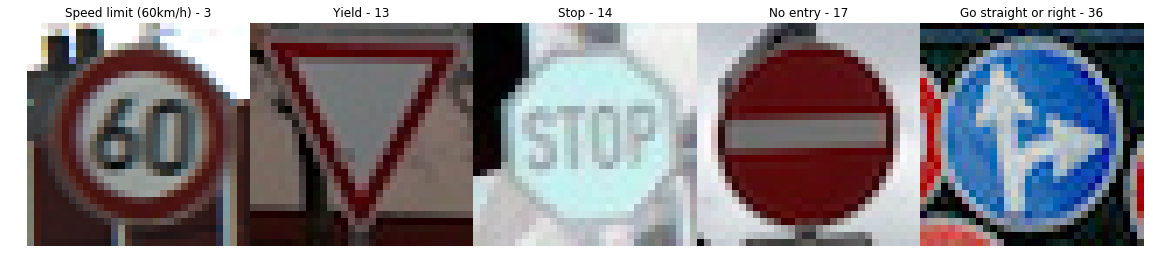

In [20]:
fig, axs = plt.subplots(1,5, figsize=(20, 8))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):    
    image = my_test_signs_images[i]    
    axs[i].axis('off')
    axs[i].imshow(image)                    
    axs[i].set_title( label_map[str(my_test_signs_labels[i])] + " - " + str(my_test_signs_labels[i]) )


#### Testing the Network on My Own Images

The choosen images were:

    - Speed limit (60 km/h)   class id = 3
    - Yield					  class id = 13
    - Stop					  class id = 14
    - No entropy		      class id = 17
    - Go straight or right	  class id = 36

Nothing in particular.

### Predict the Sign Type for Each Image

In [57]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
one_hot = tf.one_hot(my_test_signs_labels, n_classes)
softmax = tf.nn.softmax(logits)
top_predictions = tf.nn.top_k(softmax, k=5)

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet_training_save.ckpt')
    softmax_logits = sess.run(softmax, feed_dict={input_images: my_test_signs_images})
    predictions = sess.run(top_predictions, feed_dict={input_images: my_test_signs_images})

### Analyze Performance

In [58]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
correct_predictions = tf.equal(my_test_signs_labels, predictions.indices[:, 0])
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
with tf.Session() as sess:
    out_accuracy = sess.run(accuracy)

print('Accuracy:')
print(out_accuracy)
print('step3 -> analyze performance -> done! ')

Accuracy:
1.0
step3 -> analyze performance -> done! 


### Test Results
I don't know how but the model appears to have predicted the new signs perfectly, with 100% of accuracy.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

My test signs : Top 5 Softmax:
[[1.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000]]
My test signs indexes:
[ 3 13 14 17 36]
My test signs labels(names):
['Speed limit (60km/h)', 'Yield', 'Stop', 'No entry', 'Go straight or right']


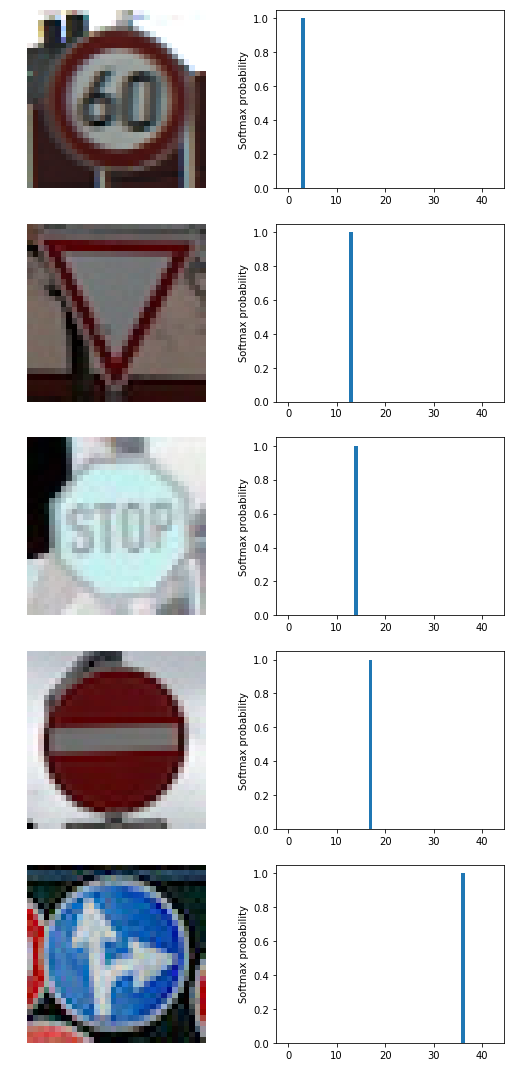

In [59]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print('My test signs : Top 5 Softmax:')
print(predictions.values)
print('My test signs indexes:')
print(predictions.indices[:, 0])
sign_types = [label_map[str(num)] for num in predictions.indices[:, 0]]
print('My test signs labels(names):')
print(sign_types)

# charts...
fig, axs = plt.subplots(5,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(my_test_signs_images[i//2])
    else:
        axs[i].bar(np.arange(n_classes), softmax_logits[(i-1)//2])         
        axs[i].set_ylabel('Softmax probability')


#### Results

The model is somehow 100% certain of 5 out of 5 of the signs that I gave it. (I can't believe that)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.